# Energy Efficiency (Regression)

In [1]:
import pandas as pd

In [2]:
energy = pd.read_excel("ENB2012_data.xlsx")
energy.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
energy.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [4]:
for col in energy.columns:
    print(col)
    print("*********************")
    print(energy[col].value_counts())
    print()

X1
*********************
0.98    64
0.90    64
0.86    64
0.82    64
0.79    64
0.76    64
0.74    64
0.71    64
0.69    64
0.66    64
0.64    64
0.62    64
Name: X1, dtype: int64

X2
*********************
514.5    64
563.5    64
588.0    64
612.5    64
637.0    64
661.5    64
686.0    64
710.5    64
735.0    64
759.5    64
784.0    64
808.5    64
Name: X2, dtype: int64

X3
*********************
294.0    192
318.5    192
343.0    128
416.5     64
245.0     64
269.5     64
367.5     64
Name: X3, dtype: int64

X4
*********************
220.50    384
147.00    192
122.50    128
110.25     64
Name: X4, dtype: int64

X5
*********************
7.0    384
3.5    384
Name: X5, dtype: int64

X6
*********************
2    192
3    192
4    192
5    192
Name: X6, dtype: int64

X7
*********************
0.10    240
0.25    240
0.40    240
0.00     48
Name: X7, dtype: int64

X8
*********************
1    144
2    144
3    144
4    144
5    144
0     48
Name: X8, dtype: int64

Y1
*********************


In [5]:
energy.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X = energy.drop(['Y1', 'Y2'], 1).to_numpy()
y = energy.drop(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], 1).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaler.fit(X)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

C:\Users\Seneca\AppData\Local\Temp/ipykernel_6068/2382515809.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = energy.drop(['Y1', 'Y2'], 1).to_numpy()
C:\Users\Seneca\AppData\Local\Temp/ipykernel_6068/2382515809.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  y = energy.drop(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], 1).to_numpy()


## Linear & Polynomial Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

### Find best polynomial degree

In [30]:
def run_polynomial_reg(X_tr, X_te):
    test_error = []
    test_var = []
    train_error = []
    train_var = []
    degrees = list(range(1, 11))
    
    # linear regression
    print("Degree: 1")
    lin_reg = LinearRegression()
    lin_reg = lin_reg.fit(X_tr, y_train)
    y_pred = lin_reg.predict(X_te)
    test_error.append(mean_squared_error(y_test, y_pred))
    test_var.append(explained_variance_score(y_test, y_pred))
    print("Test MSE: ", mean_squared_error(y_test, y_pred))
    print("Test Explained Variance: ", explained_variance_score(y_test, y_pred))
    
    y_pred = lin_reg.predict(X_tr)
    train_error.append(mean_squared_error(y_train, y_pred))
    train_var.append(explained_variance_score(y_train, y_pred))
    
    # polynomial regression
    for k in range (2, 11):
        print("Degree: ", k)
        pol = PolynomialFeatures(k)
        X_train_pol = pol.fit_transform(X_tr)
        X_test_pol = pol.fit_transform(X_te)
    
        # Train
        lin_reg = LinearRegression()
        lin_reg = lin_reg.fit(X_train_pol, y_train)
    
        # Test error
        y_pred = lin_reg.predict(X_test_pol)
        test_error.append(mean_squared_error(y_test, y_pred))
        test_var.append(explained_variance_score(y_test, y_pred))
        print("Test MSE: ", mean_squared_error(y_test, y_pred))
        print("Test Explained Variance: ", explained_variance_score(y_test, y_pred))
    
        # Train error
        y_pred = lin_reg.predict(X_train_pol)
        train_error.append(mean_squared_error(y_train, y_pred))
        train_var.append(explained_variance_score(y_train, y_pred))
       
    # make error plot
    plt.plot(degrees, test_error, label="Test")
    plt.plot(degrees, train_error, label="Train")
    plt.title("Polynomial Degree vs Train and Test Error")
    plt.xlabel("Polynomial Degree")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.show()
    
    # make explained variance plot
    plt.plot(degrees, test_var, label="Test")
    plt.plot(degrees, train_var, label="Train")
    plt.title("Polynomial Degree vs Train and Test Explained Variance Score")
    plt.xlabel("Polynomial Degree")
    plt.ylabel("Explained Variance Score")
    plt.legend()
    plt.show()

### Linear and Polynomial Regression Without Scaling

Degree: 1
Test MSE:  9.473928887107558
Test Explained Variance:  0.9039367329631596
Degree:  2
Test MSE:  1.776666517087284
Test Explained Variance:  0.9812194450573242
Degree:  3
Test MSE:  1.6434598349914515
Test Explained Variance:  0.982552314074946
Degree:  4
Test MSE:  1.082644402129154
Test Explained Variance:  0.9884413310144932
Degree:  5
Test MSE:  1.9903321686464723
Test Explained Variance:  0.9788519320756142
Degree:  6
Test MSE:  3.7020169584381586
Test Explained Variance:  0.9603563709879839
Degree:  7
Test MSE:  3.5652840333426123
Test Explained Variance:  0.9615661401947476
Degree:  8
Test MSE:  3.283734404865018
Test Explained Variance:  0.9647114917427451
Degree:  9
Test MSE:  3.8333183965856357
Test Explained Variance:  0.9587680677234443
Degree:  10
Test MSE:  3.5961897774523846
Test Explained Variance:  0.9613200920313656


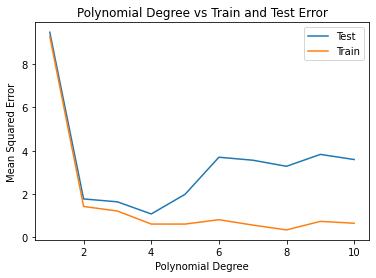

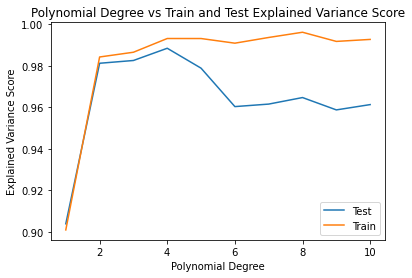

In [31]:
run_polynomial_reg(X_train, X_test)

### Linear and Polynomial Regression With Scaling

Degree: 1
Test MSE:  9.494604383689417
Test Explained Variance:  0.903859607073465
Degree:  2
Test MSE:  1.7803196001673411
Test Explained Variance:  0.9811703714264455
Degree:  3
Test MSE:  1.8048407585068111
Test Explained Variance:  0.9807061614823389
Degree:  4
Test MSE:  1.163010164847321
Test Explained Variance:  0.9876269648293268
Degree:  5
Test MSE:  83188428505.0631
Test Explained Variance:  -884615746.5392985
Degree:  6
Test MSE:  6074869586.2866335
Test Explained Variance:  -64765644.66045452
Degree:  7
Test MSE:  519.0339146365108
Test Explained Variance:  -4.535582710096245
Degree:  8
Test MSE:  291.23574444429005
Test Explained Variance:  -2.1219878788028774
Degree:  9
Test MSE:  73.56289493848388
Test Explained Variance:  0.21533847054273098
Degree:  10
Test MSE:  151.6375396264335
Test Explained Variance:  -0.6204944250252705


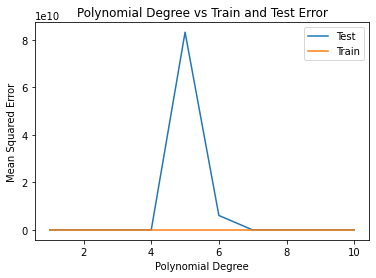

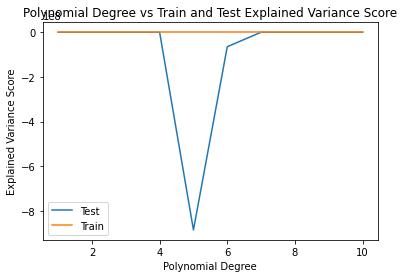

In [32]:
run_polynomial_reg(X_train_s, X_test_s)

## Support Vector Machine

In [12]:
from sklearn.svm import LinearSVR
from sklearn.multioutput import MultiOutputRegressor

In [13]:
def run_svm(X_tr, X_te):
    svr = LinearSVR()
    multi_svr = MultiOutputRegressor(svr)
    multi_svr.fit(X_tr, y_train)
    y_pred = multi_svr.predict(X_te)
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("Explained Variance Score: ", explained_variance_score(y_test, y_pred))

### SVM Without Scaling

In [14]:
run_svm(X_train, X_test)

Mean Squared Error:  33.438587215816675
Explained Variance Score:  0.8251060837734372


C:\Users\Seneca\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Seneca\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### SVM With Scaling

In [15]:
run_svm(X_train_s, X_test_s)

Mean Squared Error:  10.870072827441948
Explained Variance Score:  0.8948133892000907


## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
def run_dec_tree(X_tr, X_te):
    tree = DecisionTreeRegressor(random_state=42)
    tree.fit(X_tr, y_train)
    y_pred = tree.predict(X_te)
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("Explained Variance Score: ", explained_variance_score(y_test, y_pred))

### Decision Tree Without Scaling

In [24]:
run_dec_tree(X_train, X_test)

Mean Squared Error:  2.8324252677165345
Explained Variance Score:  0.9696445644623223


### Decision Tree With Scaling

In [25]:
run_dec_tree(X_train_s, X_test_s)

Mean Squared Error:  2.879196094488188
Explained Variance Score:  0.9690379388604704


## Random Forest Regression

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
def run_rand_forest(X_tr, X_te):
    rfr = RandomForestRegressor(random_state=42)
    rfr.fit(X_tr, y_train)
    y_pred = rfr.predict(X_te)
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("Explained Variance Score: ", explained_variance_score(y_test, y_pred))

### Random Forest Regression Without Scaling

In [28]:
run_rand_forest(X_train, X_test)

Mean Squared Error:  1.7338181172637772
Explained Variance Score:  0.981435199815003


### Random Forest Regression With Scaling

In [29]:
run_rand_forest(X_train_s, X_test_s)

Mean Squared Error:  1.7540353284251966
Explained Variance Score:  0.9811876497266685
